In [1]:
from haarpy import weingarten_class
from haarpy import weingarten_element
from functions import cycle_classes_St, z_n, wg_weighted_trace_diff, wg_weighted_trace, wg_haar
import numpy as np
import matplotlib.pyplot as plt
from sympy.combinatorics import Permutation

**Scaling of Weingarten Coefficients**

$Wg(\sqrt{d})_{\pi}$ only depends on the conjugacy class, so let's first look at the variation across conjugacy classes that have the same length (# of cycles)

In [ ]:
n = 10    # number of qubits
sqrtd = int(2**(n/2))
t = 10     # number of copies
c = 3     # number of cycles in π

conj_cl = cycle_classes_St(t, c)
wg = np.zeros(len(conj_cl))

for i in range(len(conj_cl)):
    wg[i] = weingarten_class(conj_cl[i], sqrtd)        # Weingarten coefficient for the conjugacy class
    
plt.plot(range(len(conj_cl)), np.abs(wg), 'o-')
plt.xticks(range(len(conj_cl)), [str(cl) for cl in conj_cl], rotation=45)
plt.yscale('log')
plt.xlabel('Cycle Type')
plt.ylabel(r'$|Wg(\sqrt{d})_{\pi}|$')
plt.show()

**Scaling of Weingarten Coefficients**

$Wg(\sqrt{d})_{\pi\sigma}Wg(\sqrt{d})_{\pi^{-1}\tau\sigma'}$

In [ ]:
pi = Permutation.random(t)
pi_inv = ~pi
sigma = Permutation.random(t)
tau = Permutation.random(t)
a = sum(pi.cycle_structure.values())

print(a)

**Checking a few random terms**

For a fixed t, uniformly draw 10 samples of $\sigma, \sigma', \pi, \tau$ from $S_t$, and evaluate the trace weighted by Weingarten coefficient (Eq. 47 in overleaf).

In [8]:
# t~ poly(n)
# check max-log entangled
# 2**n \gg t

nstart = 10
N_n = 7             # number of n considered
nstart = 10
nstep = 2
c = 1         # number of copies t = c*n
traces_half = np.zeros(N_n)
traces_full = np.zeros(N_n)
traces_diff = np.zeros(N_n)
nlist = np.zeros(N_n)
llist = np.zeros(N_n)
samples = 30


for j in range(N_n):
    n = j+nstart
    l = n-1
    sample_sum_half = 0
    sample_sum_full = 0
    sample_sum_diff = 0
    t = int(c*n)
    zn = z_n(n,t)
    zl = z_n(l,t)
    for i in range(samples):
        sample_sum_diff += wg_weighted_trace_diff(n,l,t,zn,zl)
        sample_sum_full += wg_haar(n,t,zn)
        sample_sum_half += wg_weighted_trace(n,t,zn)
    traces_half[j] = sample_sum_half/samples
    traces_full[j] = sample_sum_full/samples
    traces_diff[j] = sample_sum_diff/samples
    nlist[j] = n
    llist[j] = l

print(nlist)
print(llist)


[10. 11. 12. 13. 14. 15. 16.]
[ 9. 10. 11. 12. 13. 14. 15.]


<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Huaijin\AppData\Local\Temp\ipykernel_4416\3520832916.py:2: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(nlist, abs(traces_half), label='U_1 \otimes U_2')


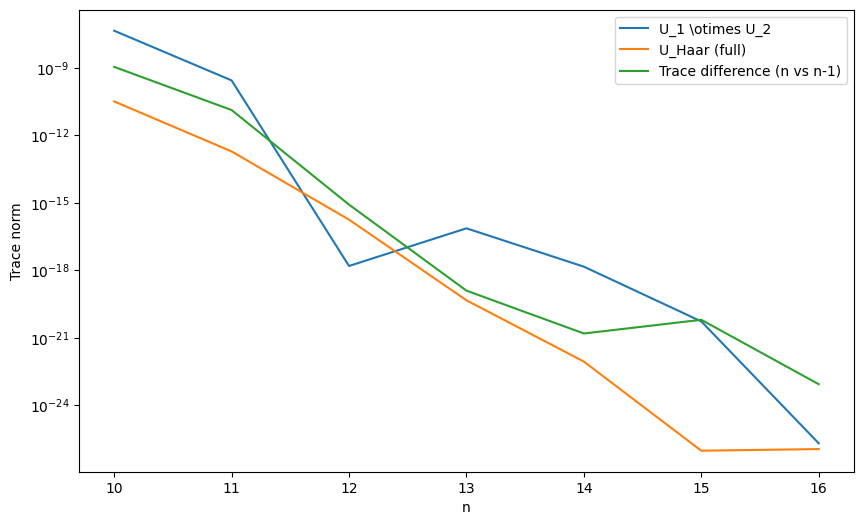

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(nlist, abs(traces_half), label='U_1 \otimes U_2')
plt.plot(nlist, abs(traces_full), label='U_Haar (full)')
plt.plot(nlist, abs(traces_diff), label='Trace difference (n vs n-1)')
plt.xlabel('n')
plt.yscale('log')
plt.xticks(nlist)
plt.ylabel('Trace norm')
plt.legend()
plt.show()